In [ ]:
''' 
Notebook examining properties of the calculated NFL production score
'''

In [24]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [29]:
dataset = pd.read_csv("model_data/input_dataset.csv", index_col=0)
dataset_with_scores = pd.read_csv("model_data/dataset_with_preds.csv", index_col=0)

In [11]:
measurables = pd.read_csv("data/Measurables.csv")
production = pd.read_csv("data/Production.csv")

<Axes: >

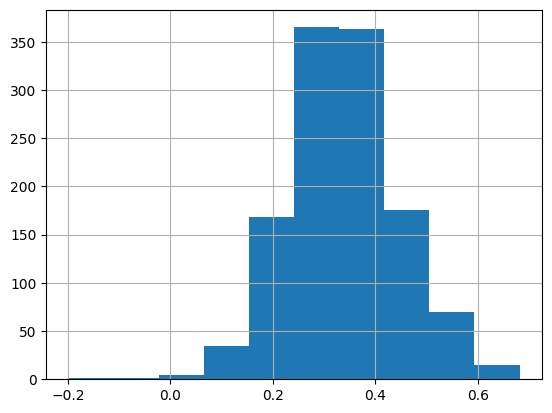

In [5]:
dataset.Score.hist(bins=10)

We can see that the average score for each position can significantly vary - the average RB score is 0.508 while the average OC score is 0.256.

In [4]:
dataset.groupby("ProPosition").Score.mean()

ProPosition
DC     0.283457
DE     0.385116
DS     0.313984
DT     0.374987
FB     0.314025
ILB    0.293571
OC     0.256561
OG     0.247711
OLB    0.405178
OT     0.216458
QB     0.325457
RB     0.508370
TE     0.318163
WR     0.384706
Name: Score, dtype: float64

This is an artifact of the distribution of Positive Plays and Negative Plays - RBs have the highest percentage of positive plays (PosPlay%).

In [30]:
qb = dataset.query("ProPosition == 'QB'")
# QBs look good
rb = dataset.query("ProPosition == 'RB'")
''' 
ALL rbs are SUPER skewed to having positive plays. All scores super high
'''
de = dataset.query("ProPosition == 'DE'")
og = dataset_with_scores.query("ProPosition == 'OG'")

In [36]:
og_ids_to_check = [
    98373,  # 1st,
    92052,  # 2nd,
    36407, # 4th best,
    43757,  # 2nd to last,
    11187,  # last, 
    ]

In [37]:
pd.merge(production.query("PlayerId in @og_ids_to_check").sort_values(["PlayerId", "Season"]), measurables, on='PlayerId')

,PlayerId,Season,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,DraftSeason,CollegePosition,ProPosition,FirstName,LastName,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,Test,TestAttempt,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,BodyFat,LeanMass,IndyInvite
0,11187,2014,16,16,928,39,88,2013,OG,OG,DEMETRIUS,DAVIS,76.13,303,23.4,5.20,34.625,9.500,83.750,31.0,40.0,1.82,3.04,7.95,27.0,8.11,4.66,NaN,22.0,NaN,NaN,N
1,11187,2015,14,9,679,41,65,2013,OG,OG,DEMETRIUS,DAVIS,76.13,303,23.4,5.20,34.625,9.500,83.750,31.0,40.0,1.82,3.04,7.95,27.0,8.11,4.66,NaN,22.0,NaN,NaN,N
2,11187,2016,10,7,459,16,33,2013,OG,OG,DEMETRIUS,DAVIS,76.13,303,23.4,5.20,34.625,9.500,83.750,31.0,40.0,1.82,3.04,7.95,27.0,8.11,4.66,NaN,22.0,NaN,NaN,N
3,11187,2017,13,13,874,43,86,2013,OG,OG,DEMETRIUS,DAVIS,76.13,303,23.4,5.20,34.625,9.500,83.750,31.0,40.0,1.82,3.04,7.95,27.0,8.11,4.66,NaN,22.0,NaN,NaN,N
4,11187,2018,14,11,690,22,80,2013,OG,OG,DEMETRIUS,DAVIS,76.13,303,23.4,5.20,34.625,9.500,83.750,31.0,40.0,1.82,3.04,7.95,27.0,8.11,4.66,NaN,22.0,NaN,NaN,N
5,36407,2014,13,9,673,32,44,2014,OG,OG,EGO,MOTEN,74.63,310,20.9,4.94,34.125,9.500,80.125,17.0,50.0,1.81,2.88,8.18,27.5,8.06,4.77,NaN,25.0,19.1,251.242,Y
6,36407,2015,16,16,1101,61,67,2014,OG,OG,EGO,MOTEN,74.63,310,20.9,4.94,34.125,9.500,80.125,17.0,50.0,1.81,2.88,8.18,27.5,8.06,4.77,NaN,25.0,19.1,251.242,Y
7,36407,2016,16,16,1126,64,120,2014,OG,OG,EGO,MOTEN,74.63,310,20.9,4.94,34.125,9.500,80.125,17.0,50.0,1.81,2.88,8.18,27.5,8.06,4.77,NaN,25.0,19.1,251.242,Y
8,36407,2017,13,13,859,47,89,2014,OG,OG,EGO,MOTEN,74.63,310,20.9,4.94,34.125,9.500,80.125,17.0,50.0,1.81,2.88,8.18,27.5,8.06,4.77,NaN,25.0,19.1,251.242,Y
9,36407,2018,13,13,780,24,52,2014,OG,OG,EGO,MOTEN,74.63,310,20.9,4.94,34.125,9.500,80.125,17.0,50.0,1.81,2.88,8.18,27.5,8.06,4.77,NaN,25.0,19.1,251.242,Y


In [35]:
og.describe()

,Pred_Score,Pred_Error,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,Success
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000,80.000000,84.000000,84.000000,84.000000,79.000000,79.000000,78.000000,78.000000,77.000000,80.000000,0.0,76.000000,84.000000,84.000000
mean,0.246050,0.001661,3.321429,38.666667,26.892857,1864.095238,87.690476,169.666667,0.696491,0.463790,0.044139,0.096551,0.859310,0.247711,76.001071,313.857143,22.798795,5.228250,33.385417,9.974702,80.188988,1.829367,3.021013,7.802308,27.820513,8.231948,4.767500,NaN,26.894737,0.662349,0.309524
std,0.023726,0.071401,1.054659,17.759663,19.877952,1307.228353,71.976398,113.220473,0.203305,0.288601,0.012199,0.020454,0.019523,0.072629,1.104954,11.232636,0.805241,0.180868,0.946858,0.528830,1.855013,0.063998,0.093980,0.280310,2.701580,0.514393,0.187303,NaN,5.178363,0.152067,0.465074
min,0.189227,-0.230322,1.000000,3.000000,0.000000,75.000000,3.000000,5.000000,0.125000,0.000000,0.013089,0.050000,0.806283,-0.022680,74.000000,286.000000,20.700000,4.860000,30.500000,8.875000,75.250000,1.690000,2.810000,7.200000,21.500000,7.010000,4.440000,NaN,9.000000,0.296300,0.000000
25%,0.230407,-0.043322,2.750000,23.500000,8.000000,689.500000,27.000000,71.000000,0.605469,0.214844,0.035567,0.083353,0.846825,0.196959,75.220000,307.000000,22.250000,5.087500,32.750000,9.625000,78.937500,1.790000,2.955000,7.600000,25.500000,8.040000,4.630000,NaN,23.750000,0.562775,0.000000
50%,0.247612,0.003752,4.000000,43.500000,24.000000,1725.000000,60.500000,164.500000,0.734375,0.414062,0.044205,0.096268,0.857732,0.250035,75.815000,313.000000,22.900000,5.225000,33.375000,10.000000,80.250000,1.820000,3.030000,7.785000,28.000000,8.070000,4.765000,NaN,27.500000,0.688100,0.000000
75%,0.262133,0.053875,4.000000,51.000000,45.250000,2992.250000,141.750000,264.000000,0.829427,0.722656,0.052543,0.108398,0.874216,0.298041,76.750000,319.000000,23.250000,5.342500,34.031250,10.281250,81.500000,1.870000,3.085000,7.967500,29.500000,8.110000,4.845000,NaN,30.000000,0.789200,1.000000
max,0.300297,0.166691,4.000000,64.000000,64.000000,4511.000000,306.000000,541.000000,1.000000,1.000000,0.075157,0.180628,0.920000,0.411420,79.000000,346.000000,25.800000,5.770000,35.750000,11.125000,84.875000,1.980000,3.250000,8.410000,34.000000,9.060000,5.370000,NaN,40.000000,1.045500,1.000000


In [34]:
og.sort_values("Pred_Score", ascending=False).iloc[0:100,:]

,Pred_Score,Pred_Error,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,IndyInvite,Success
98373,0.300297,-0.114929,4,49,37,2599,52,316,0.765625,0.578125,0.020008,0.121585,0.858407,0.185369,OG,76.75,329.0,20.7,5.61,33.000,10.125,82.000,1.96,3.23,8.08,27.0,7.11,5.15,NaN,22.0,0.7941,Y,0
92052,0.300065,-0.066922,4,56,13,1179,41,121,0.875000,0.203125,0.034775,0.102629,0.862595,0.233144,OG,75.13,312.0,21.7,4.96,34.750,9.375,81.750,1.76,2.89,NaN,NaN,NaN,NaN,NaN,27.0,0.5918,Y,0
51802,0.290457,-0.061615,4,42,14,1166,56,115,0.656250,0.218750,0.048027,0.098628,0.853345,0.228842,OG,75.63,309.0,22.0,5.29,33.500,9.625,80.000,1.90,3.15,7.77,25.0,8.05,4.58,NaN,21.0,0.3939,Y,0
36407,0.282381,0.052288,4,58,54,3759,204,320,0.906250,0.843750,0.054270,0.085129,0.860601,0.334669,OG,74.63,310.0,20.9,4.94,34.125,9.500,80.125,1.81,2.88,8.18,27.5,8.06,4.77,NaN,25.0,0.3400,Y,1
84453,0.280511,0.004399,3,37,32,2295,136,229,0.770833,0.666667,0.059259,0.099782,0.840959,0.284910,OG,75.25,320.0,21.9,5.06,34.125,10.000,82.125,1.79,2.97,7.45,NaN,NaN,4.63,NaN,27.0,0.8148,Y,0
68986,0.280047,0.048762,4,47,47,3144,158,216,0.734375,0.734375,0.050254,0.068702,0.881043,0.328809,OG,76.25,302.0,22.6,4.97,33.875,9.875,81.500,1.74,2.86,7.37,32.0,9.06,4.44,NaN,22.0,0.6444,Y,1
26456,0.279754,-0.067808,2,16,11,757,30,71,0.500000,0.343750,0.039630,0.093791,0.866579,0.211946,OG,77.88,330.0,21.8,5.36,32.000,9.500,77.750,1.89,3.04,8.13,26.5,8.07,4.86,NaN,36.0,0.6923,Y,0
19930,0.277654,0.067059,4,50,44,3180,239,256,0.781250,0.687500,0.075157,0.080503,0.844340,0.344713,OG,77.00,346.0,22.6,4.99,33.500,10.000,80.250,1.72,2.81,7.38,32.0,8.09,4.58,NaN,36.0,0.6111,N,1
48438,0.275777,-0.025727,1,7,0,100,3,5,0.437500,0.000000,0.030000,0.050000,0.920000,0.250050,OG,74.00,317.0,22.4,5.43,33.750,9.625,78.750,1.95,3.10,8.07,23.0,7.11,4.82,NaN,35.0,0.5667,Y,0
17637,0.275103,-0.106290,3,17,1,99,6,11,0.354167,0.020833,0.060606,0.111111,0.828283,0.168813,OG,74.50,293.0,23.4,4.86,33.125,9.500,78.625,1.71,2.87,7.99,31.5,9.04,4.65,NaN,20.0,0.5510,Y,0


In [23]:
rb.sort_values("Score", ascending=False).iloc[0:100,:]

,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,IndyInvite,Success
80233,4,64,64,2371,479,43,1.000000,1.000000,0.202024,0.018136,0.779840,0.681383,RB,70.00,218.0,23.4,4.61,31.750,10.250,77.250,1.64,2.66,7.01,35.5,9.09,4.19,11.86,16.0,0.8000,Y,1
16287,4,51,48,2029,384,26,0.796875,0.750000,0.189256,0.012814,0.797930,0.630372,RB,71.00,230.0,22.9,4.60,31.000,9.500,73.500,1.67,2.66,7.33,33.5,9.07,4.54,11.77,NaN,0.4857,Y,1
31235,4,58,57,2897,513,55,0.906250,0.890625,0.177080,0.018985,0.803935,0.626208,RB,72.63,222.0,20.8,NaN,31.500,10.000,76.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.2449,Y,1
85599,4,54,43,1512,293,30,0.843750,0.671875,0.193783,0.019841,0.786376,0.625475,RB,72.63,233.0,21.5,4.61,33.000,10.375,77.750,1.63,2.65,7.67,29.0,9.05,4.59,12.01,20.0,0.5116,Y,1
44369,4,61,43,2194,407,56,0.953125,0.671875,0.185506,0.025524,0.788970,0.619074,RB,68.25,206.0,22.1,4.54,29.375,9.625,71.750,1.63,2.59,7.11,31.5,9.10,4.26,11.83,14.0,0.7857,Y,1
91595,4,55,51,2388,441,56,0.859375,0.796875,0.184673,0.023451,0.791876,0.616132,RB,72.63,215.0,22.1,4.48,32.375,9.750,76.375,1.56,2.55,7.04,35.0,10.06,4.07,11.00,19.0,0.6250,Y,1
44023,2,16,3,299,69,3,0.500000,0.093750,0.230769,0.010033,0.759197,0.611010,RB,69.75,223.0,21.9,NaN,31.375,10.250,75.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.6333,Y,1
45220,4,47,47,2740,518,51,0.734375,0.734375,0.189051,0.018613,0.792336,0.609736,RB,73.38,230.0,21.2,4.53,31.500,10.125,74.750,1.56,2.61,6.75,31.5,9.10,4.24,11.50,24.0,0.4848,Y,1
89918,3,35,8,362,84,12,0.729167,0.166667,0.232044,0.033149,0.734807,0.606669,RB,72.00,204.0,21.4,4.58,31.750,9.000,76.125,1.61,2.62,7.03,35.0,10.03,4.25,11.50,NaN,0.6286,Y,1
52348,4,60,16,963,175,16,0.937500,0.250000,0.181724,0.016615,0.801661,0.602823,RB,74.38,223.0,23.0,4.63,32.375,10.125,76.375,1.61,2.64,7.15,32.0,10.01,4.50,11.86,13.0,0.2600,Y,1


In [20]:
qb_ids_to_check = [
    23427,  # 1st,
    23926,  # 2nd, 
    35935,  # 3rd,
    97792,  # 9th,
    28548
    ]

In [21]:
pd.merge(production.query("PlayerId in @qb_ids_to_check").sort_values(["PlayerId", "Season"]), measurables, on='PlayerId')

,PlayerId,Season,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,DraftSeason,CollegePosition,ProPosition,FirstName,LastName,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,Test,TestAttempt,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,BodyFat,LeanMass,IndyInvite
0,23427,2012,16,16,1016,179,56,2012,QB,QB,MICHAEL,LEMON,70.88,204,23.4,4.53,31.250,10.250,76.000,28.0,40.0,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,11.0,181.869,Y
1,23427,2013,16,16,1006,174,70,2012,QB,QB,MICHAEL,LEMON,70.88,204,23.4,4.53,31.250,10.250,76.000,28.0,40.0,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,11.0,181.869,Y
2,23427,2014,16,16,1090,159,72,2012,QB,QB,MICHAEL,LEMON,70.88,204,23.4,4.53,31.250,10.250,76.000,28.0,40.0,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,11.0,181.869,Y
3,23427,2015,16,16,1074,183,66,2012,QB,QB,MICHAEL,LEMON,70.88,204,23.4,4.53,31.250,10.250,76.000,28.0,40.0,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,11.0,181.869,Y
4,23427,2016,16,16,1037,163,79,2012,QB,QB,MICHAEL,LEMON,70.88,204,23.4,4.53,31.250,10.250,76.000,28.0,40.0,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,11.0,181.869,Y
5,23427,2017,16,16,1082,200,95,2012,QB,QB,MICHAEL,LEMON,70.88,204,23.4,4.53,31.250,10.250,76.000,28.0,40.0,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,11.0,181.869,Y
6,23427,2018,16,16,1096,152,66,2012,QB,QB,MICHAEL,LEMON,70.88,204,23.4,4.53,31.250,10.250,76.000,28.0,40.0,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,11.0,181.869,Y
7,23926,2012,16,16,1001,151,80,2012,QB,QB,JAMES,AIONO,76.00,229,23.8,4.59,32.625,9.000,76.250,34.0,47.0,1.61,2.65,NaN,NaN,NaN,NaN,NaN,NaN,12.4,194.226,Y
8,23926,2013,16,16,1035,198,93,2012,QB,QB,JAMES,AIONO,76.00,229,23.8,4.59,32.625,9.000,76.250,34.0,47.0,1.61,2.65,NaN,NaN,NaN,NaN,NaN,NaN,12.4,194.226,Y
9,23926,2014,16,16,1095,186,93,2012,QB,QB,JAMES,AIONO,76.00,229,23.8,4.59,32.625,9.000,76.250,34.0,47.0,1.61,2.65,NaN,NaN,NaN,NaN,NaN,NaN,12.4,194.226,Y


In [10]:
qb.sort_values("Score", ascending=False)

,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,IndyInvite,Success
23427,4,64,64,4186,695,264,1.000000,1.000000,0.166030,0.063067,0.770903,0.549756,QB,70.88,204.0,23.4,4.53,31.250,10.250,76.000,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,0.7000,Y,1
23926,4,64,64,4183,690,361,1.000000,1.000000,0.164953,0.086302,0.748745,0.505541,QB,76.00,229.0,23.8,4.59,32.625,9.000,76.250,1.61,2.65,NaN,NaN,NaN,NaN,NaN,NaN,0.7234,Y,1
35935,4,56,54,3779,716,405,0.875000,0.843750,0.189468,0.107171,0.703361,0.473607,QB,75.75,231.0,21.3,4.93,32.000,9.375,78.750,1.73,2.87,7.16,28.5,8.07,4.36,NaN,NaN,0.5400,Y,1
80480,4,55,55,3875,673,379,0.859375,0.859375,0.173677,0.097806,0.728516,0.468112,QB,76.13,234.0,22.6,4.67,32.750,10.000,77.875,1.63,2.66,6.80,36.0,10.04,4.28,NaN,NaN,0.8605,Y,1
72215,4,56,55,3487,553,307,0.875000,0.859375,0.158589,0.088041,0.753370,0.467748,QB,75.75,222.0,21.5,4.48,32.000,9.875,76.375,1.58,2.57,6.87,36.0,10.01,4.11,NaN,NaN,0.6600,Y,1
61559,4,62,62,4098,583,364,0.968750,0.968750,0.142265,0.088824,0.768912,0.463794,QB,74.38,214.0,23.1,4.66,33.250,9.250,75.750,1.63,2.65,NaN,34.5,9.02,4.20,NaN,NaN,0.8519,Y,1
39573,4,62,61,4243,625,411,0.968750,0.953125,0.147301,0.096865,0.755833,0.454910,QB,77.00,232.0,22.0,4.90,32.875,9.500,78.000,1.75,2.81,7.08,32.5,9.07,4.21,NaN,NaN,0.5600,Y,1
15137,4,42,40,2668,442,219,0.656250,0.625000,0.165667,0.082084,0.752249,0.443648,QB,74.38,223.0,22.2,4.36,32.250,9.500,77.750,1.52,2.57,NaN,39.0,10.00,NaN,NaN,NaN,0.7273,Y,1
97792,4,23,7,586,93,37,0.359375,0.109375,0.158703,0.063140,0.778157,0.396534,QB,74.25,226.0,22.5,4.96,31.000,9.250,75.375,1.80,2.86,7.04,30.5,9.02,4.26,NaN,NaN,0.5800,Y,1
97460,4,35,29,1905,232,120,0.546875,0.453125,0.121785,0.062992,0.815223,0.393472,QB,74.13,208.0,21.5,4.77,33.000,9.250,79.000,1.63,2.76,7.17,30.0,9.05,4.20,NaN,NaN,0.6452,Y,1
